In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
#Read the csv file as dataframe
df = pd.read_csv("C:\\Users\\belga\\work\\data_processed.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779831 entries, 0 to 2779830
Data columns (total 66 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Severity                     int64  
 1   Start_Time                   object 
 2   Start_Lat                    float64
 3   Start_Lng                    float64
 4   Distance(mi)                 float64
 5   Street                       object 
 6   Side                         object 
 7   City                         object 
 8   County                       object 
 9   State                        object 
 10  Timezone                     object 
 11  Temperature(F)               float64
 12  Humidity(%)                  float64
 13  Pressure(in)                 float64
 14  Visibility(mi)               float64
 15  Wind_Speed(mph)              float64
 16  Precipitation(in)            float64
 17  Weather_Condition            object 
 18  Amenity                      bool   
 19  

In [9]:
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,...,DayofWeek_Tuesday,DayofWeek_Wednesday,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Street_freq,City_freq,County_freq,State_freq
0,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Outerbelt E,R,Dublin,Franklin,OH,...,0,0,1,1,1,1,0.000085,0.000452,0.002062,0.008211
1,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,I-70 E,R,Dayton,Montgomery,OH,...,0,0,1,1,1,1,0.003224,0.001994,0.014877,0.008211
2,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,I-75 S,R,Cincinnati,Hamilton,OH,...,0,0,1,1,1,0,0.004259,0.001305,0.005907,0.008211
3,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,I-77 N,R,Akron,Summit,OH,...,0,0,1,1,0,0,0.001569,0.000385,0.001130,0.008211
4,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,I-75 S,R,Cincinnati,Hamilton,OH,...,0,0,0,0,0,0,0.004259,0.001305,0.005907,0.008211


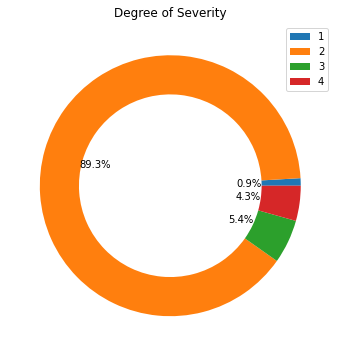

In [10]:
# severity analysis
fig,axs= plt.subplots(figsize=(9,6))
cmap=plt.get_cmap('tab10')
clr=cmap(np.arange(4))
accidents_severity= df.groupby('Severity').count()['City']
plt.pie(accidents_severity,wedgeprops=dict(width=0.3),autopct='%.1f%%',colors= clr)
plt.legend(accidents_severity.index,loc='upper right')
plt.title('Degree of Severity')
plt.show();
#Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

The Severity analysis reveals that the vast majority of accidents are of type 2, 89.1%

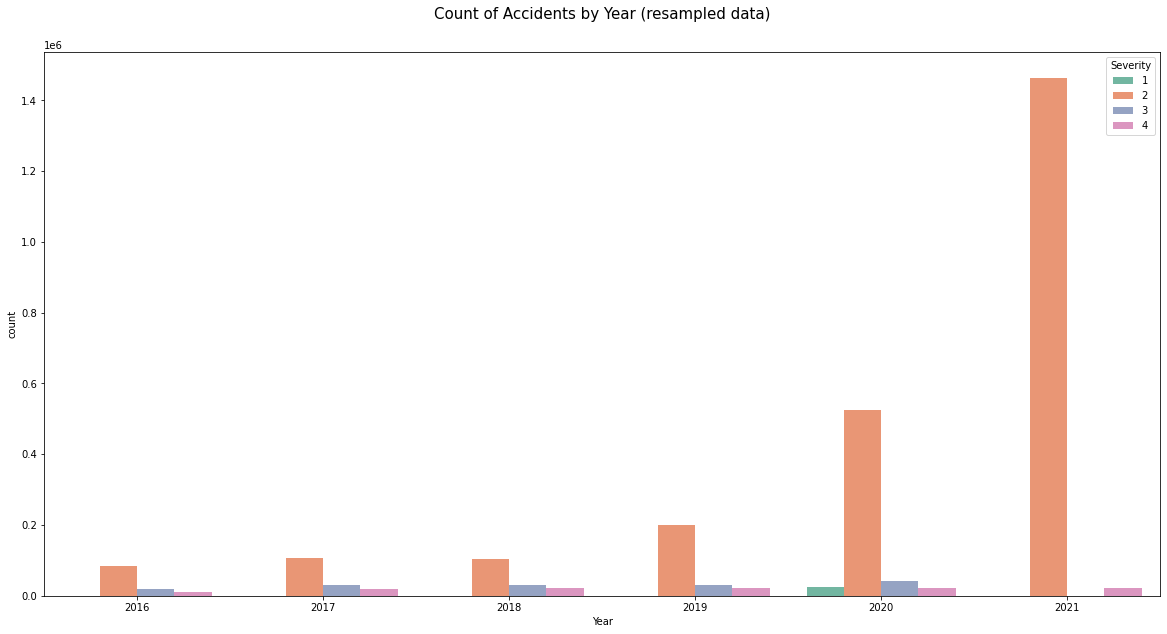

In [11]:
sns.countplot(x='Year', hue='Severity', data=df ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [12]:
df[df.Severity == 1]['Year'].unique()

array([2020], dtype=int64)

Data about the accidents classified in the class 1 is only available in the year 2020, we can mix class 1 and 2 in one class

In [13]:
data =df.copy()
data.loc[data.Severity == 1 , 'Severity'] = 2
data.loc[data.Severity == 2 , 'Severity'] = 0
data.loc[data.Severity == 3 , 'Severity'] = 1
data.loc[data.Severity == 4 , 'Severity'] = 2

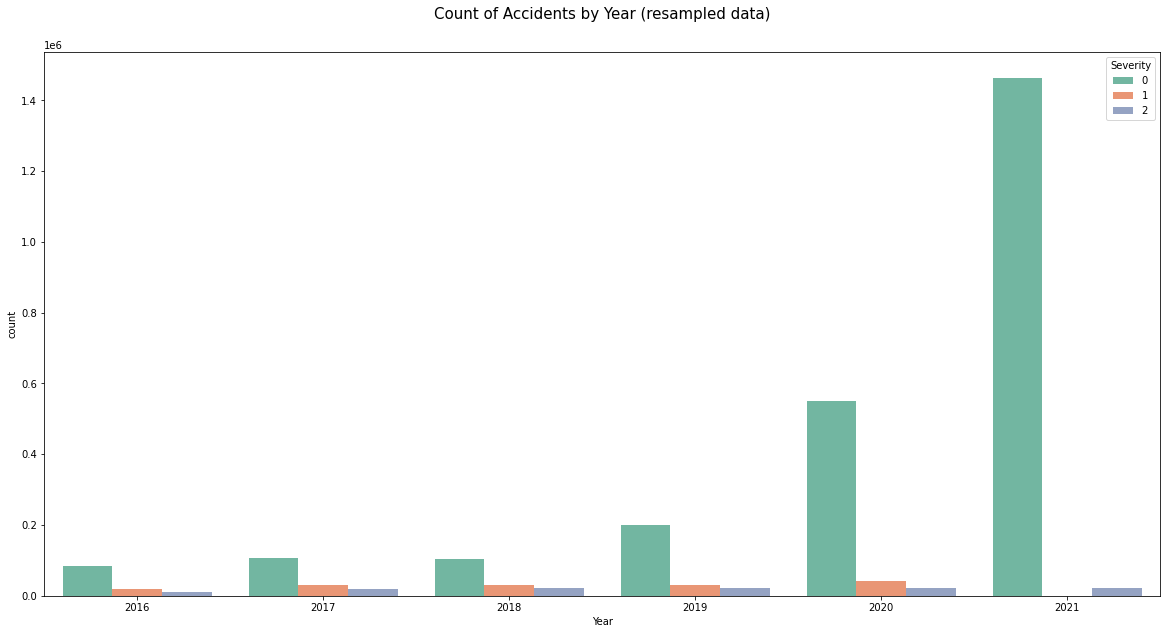

In [14]:
sns.countplot(x='Year', hue='Severity', data=data ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.gcf().set_size_inches(20, 10)
plt.show()

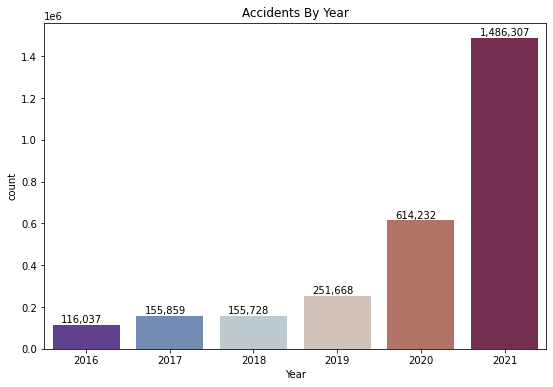

In [15]:
#Yearly Accident analysis
fig,axs= plt.subplots(figsize=(9,6))
sns.countplot(x='Year',data=df,palette = 'twilight_shifted' );
for i in axs.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.70
    y = i.get_height()+11500
    axs.annotate(count, (x, y))
plt.title("Accidents By Year")
plt.show()

The yearly accident count reveals that 2021 is the most deadliest year on record followed by 2020 and 2019 respectively.

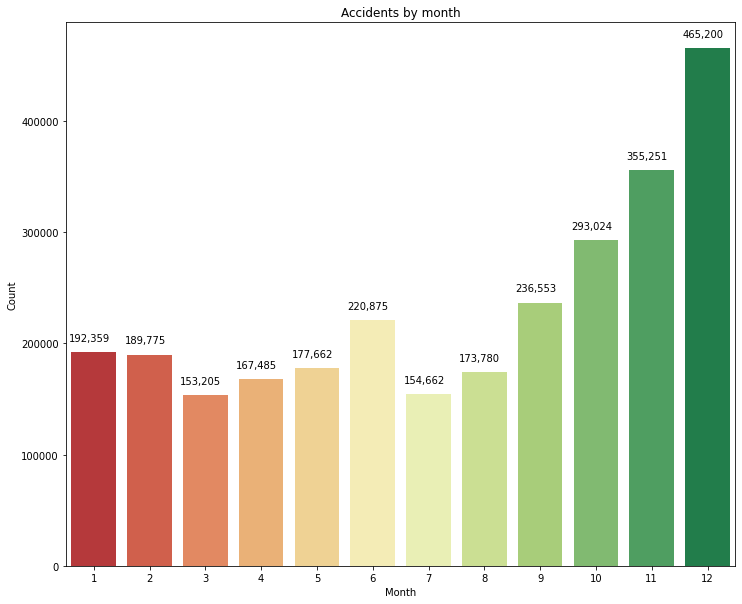

In [16]:
#Monthly Analysis of accidents
fig,axs= plt.subplots(figsize=(12,10))
sns.countplot(x='Month', data=df,palette='RdYlGn')
for i in axs.patches:
    x= i.get_x()+i.get_width()-0.85
    y= i.get_height()+ 10000
    count= '{:,.0f}'.format(i.get_height())
    axs.annotate(count,(x,y))
axs.set(xlabel='Month',ylabel='Count',title='Accidents by month')
plt.show();

Among the months december has the maximum number of accidents followed by november.

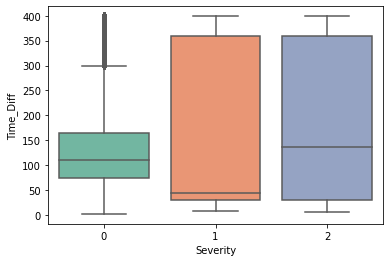

In [17]:
sns.boxplot(x="Severity", y="Time_Diff",
            data=data.loc[(data['Time_Diff']<400)], palette="Set2")
plt.show()

In [18]:
def remove_outliers(df,col):
    """
    Removes outliers outside 3 standard deviations.
    
    Args: df: dataframe, col: the column to remove outliers
    
    Returns: updated dataframe without the outliers.
    """
    cutoff = df[col].std()*3
    lower_limit = df[col].mean() - cutoff
    upper_limit = df[col].mean() + cutoff
    
    df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]
    return df

In [19]:
data=remove_outliers(data,'Time_Diff')

In [20]:
len(data)

2778294

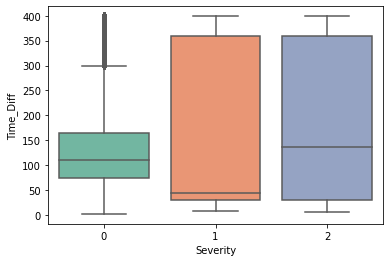

In [21]:
sns.boxplot(x="Severity", y="Time_Diff",data=data.loc[(data['Time_Diff']<400)], palette="Set2")
plt.show()

In [22]:
data=remove_outliers(data,'Distance(mi)').copy()

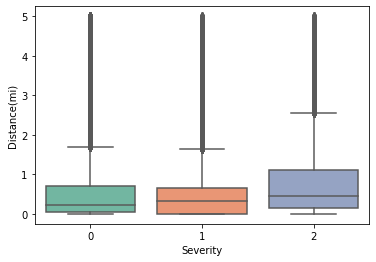

In [23]:
sns.boxplot(x="Severity", y="Distance(mi)",
            data=data.loc[(data['Distance(mi)']<5)], palette="Set2")
plt.show()

<AxesSubplot:xlabel='DayofWeek', ylabel='count'>

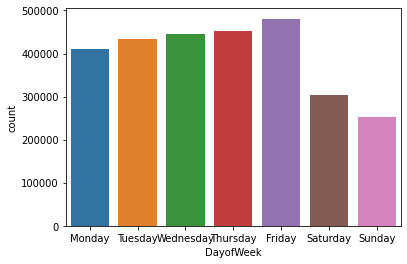

In [24]:
sns.countplot(x='DayofWeek', data=df )

looking at the accidents by days of the week plot, we can see that weekdays have higher percentage of accident occurence when compared to weekends.
Fridays record the highest percentage of accidents among all days. With the peak between 4-6pm.

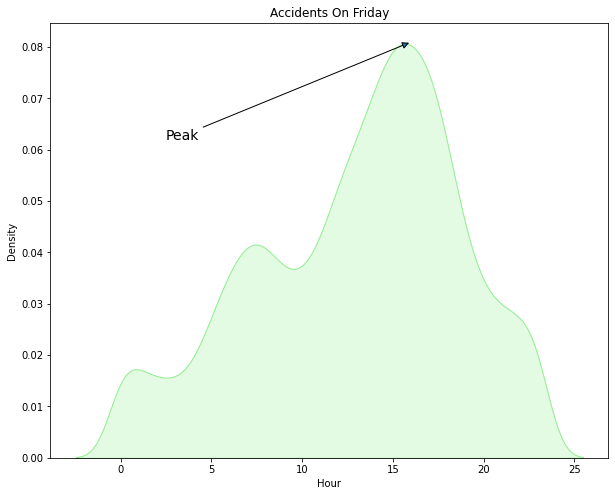

In [25]:
#As we can see friday has the highest percentage of casualities. Lets take a closer look at Friday.
fridays=df[df.DayofWeek=='Friday']
fig, ax = plt.subplots(figsize=(10,8))
sns.kdeplot(fridays.Hour,fill=True,bw_adjust=2,color='lightgreen',data=fridays);
plt.annotate('Peak',xy=(16,0.081),xytext=(2.5,0.062),arrowprops={'arrowstyle':'-|>'},fontsize= 14)
plt.title('Accidents On Friday')
plt.show()

Accidents by the hour has 2 peaks,one during 6-10 am period and the notable peak during 2-7pm. This might be because, people leave and get back from work during these intervals, which results in greater movement of population and hence higher the chance of accidents.

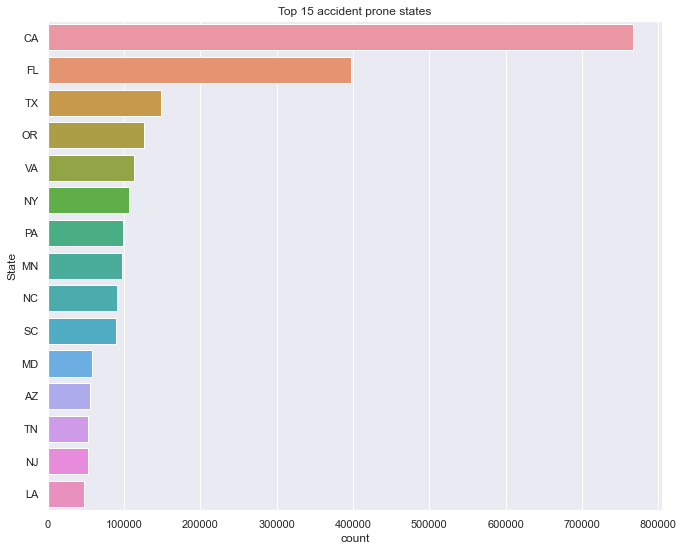

In [26]:
# 15 most accident prone states 
state_count15=df["State"].value_counts().sort_values(ascending=False)[:15]
sns.set_style('white')
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(x=state_count15.values,y= state_count15.index)
plt.xlabel('count')
plt.ylabel('State')
plt.title("Top 15 accident prone states")
plt.show()

From location analysis it is evident that California is the most accident prone state followed by Florida and Texas.
This is in accordance with their respective population with California being the most populous state in US.

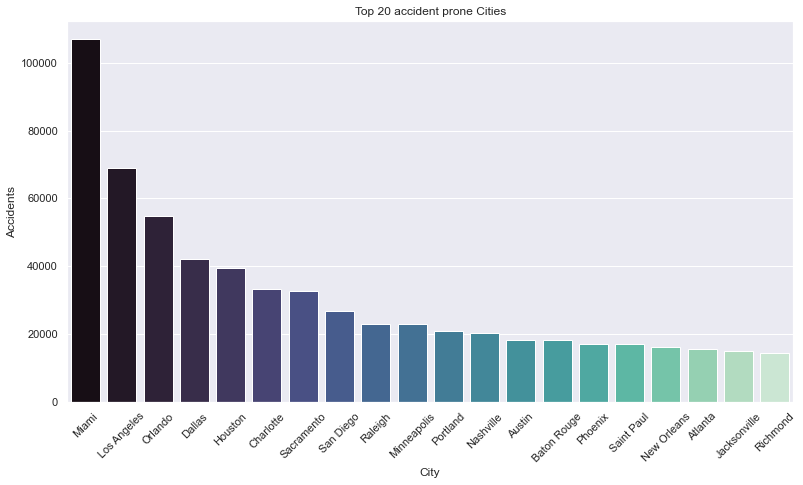

In [27]:
#20 most accident prone cities.
city_count= df.City.value_counts()
fig,axs= plt.subplots(figsize=(13,7))
sns.countplot(x="City",order= city_count.index[:20],data= df,palette= 'mako')
plt.ylabel('Accidents')
plt.xticks(rotation=45)
plt.title('Top 20 accident prone Cities')
plt.show()

Miami, los angeles and Orlando make up the three most accident prone cities in the US.

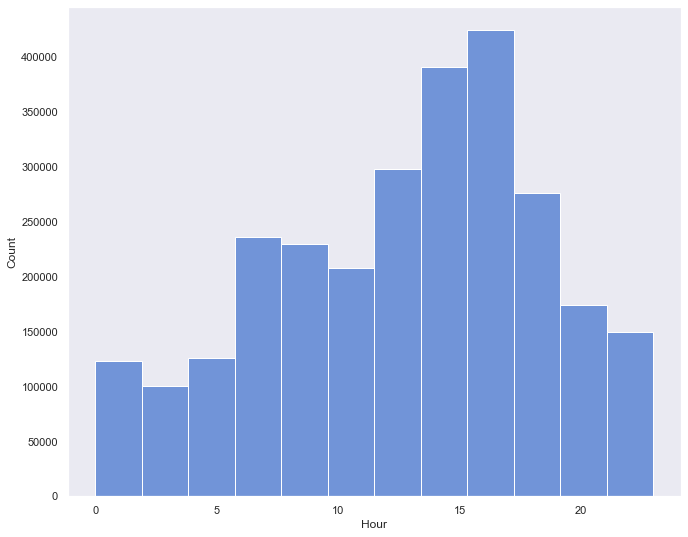

In [28]:
#Accidents by the hour
hr=data.Hour
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.histplot(hr,bins= 12);

## Weather based Analysis

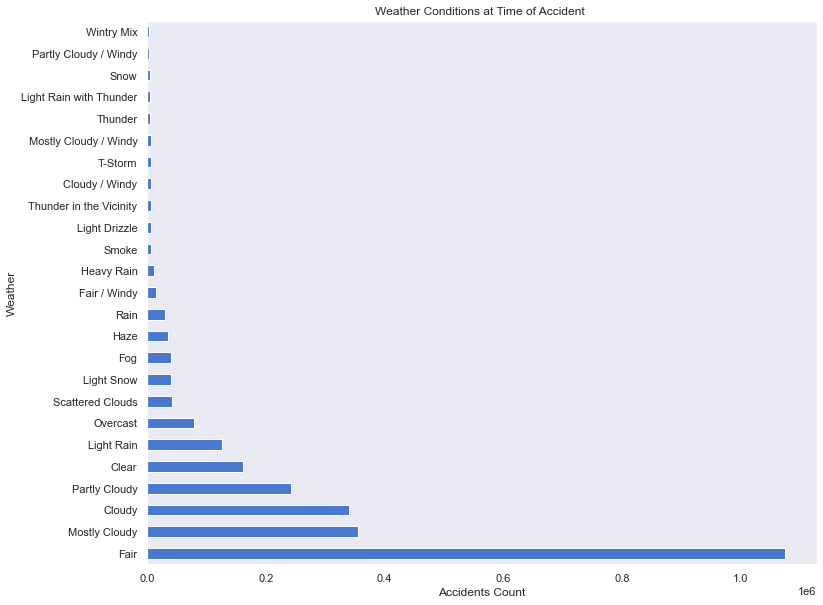

In [29]:
weather_count= data.Weather_Condition.value_counts()[:25]
fig, ax = plt.subplots(figsize=(12,10))
weather_count.plot(kind='barh')
ax.set(title = 'Weather Conditions at Time of Accident ',
       xlabel = 'Accidents Count',
       ylabel = 'Weather')
plt.show()

The vast majority of accidents occur at fair weather conditions.

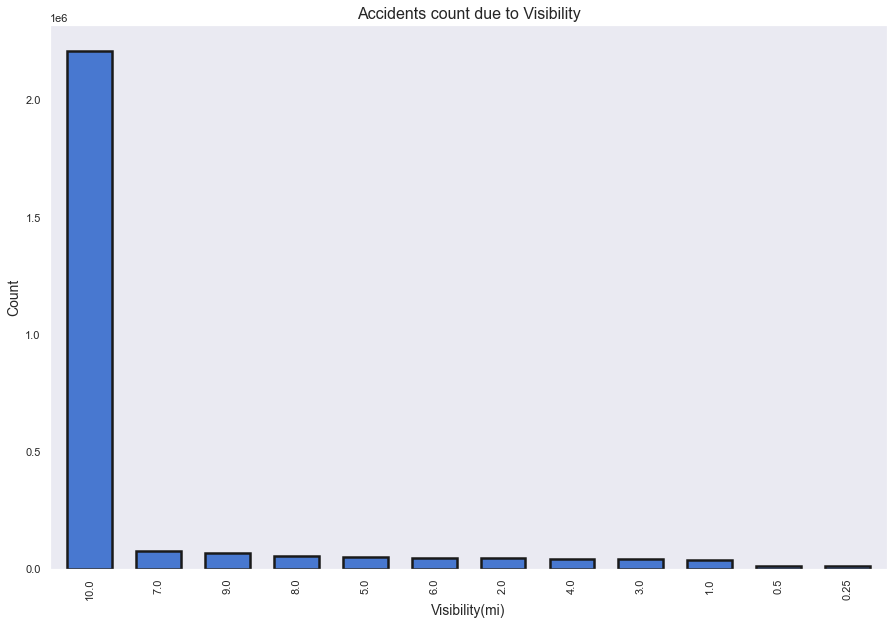

In [30]:
fig= plt.gcf()
fig.set_size_inches(15, 10);
#sns.displot(weather_df,x= 'Visibility(mi)',)
data['Visibility(mi)'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.65,edgecolor='k',align='center',linewidth=2.5)
plt.xlabel('Visibility(mi)',fontsize=14)
plt.ylabel('Count',fontsize= 14)
plt.title('Accidents count due to Visibility',fontsize=16)
plt.show();

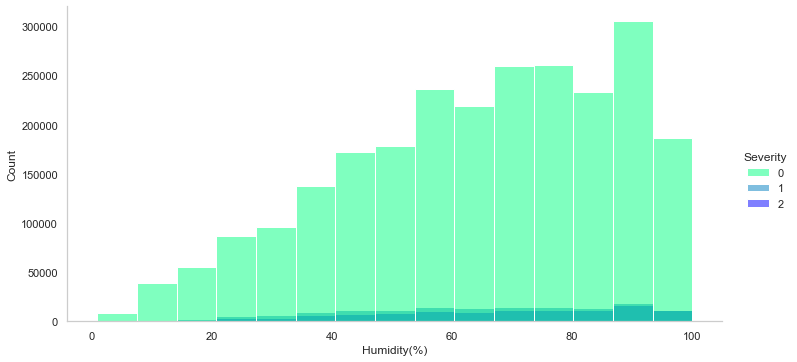

In [31]:
sns.set_style("whitegrid", {'axes.grid' : False})
hum=sns.displot(data,x='Humidity(%)',hue='Severity',bins=15,palette = 'winter_r',height=5.2,aspect=2)

In [32]:
len(data)

2737836

In [33]:
data.Severity.value_counts()

0    2474496
1     149477
2     113863
Name: Severity, dtype: int64

In [34]:
data =data.drop(['Day','Distance(mi)','Year','Time_Diff','Timezone_US/Central',
       'Timezone_US/Eastern', 'Timezone_US/Mountain', 'Timezone_US/Pacific','City_freq', 'County_freq', 'State_freq'],axis=1)
data = data.select_dtypes(exclude=['object'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2737836 entries, 0 to 2779830
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Severity                     int64  
 1   Start_Lat                    float64
 2   Start_Lng                    float64
 3   Temperature(F)               float64
 4   Humidity(%)                  float64
 5   Pressure(in)                 float64
 6   Visibility(mi)               float64
 7   Wind_Speed(mph)              float64
 8   Precipitation(in)            float64
 9   Amenity                      bool   
 10  Bump                         bool   
 11  Crossing                     bool   
 12  Give_Way                     bool   
 13  Junction                     bool   
 14  No_Exit                      bool   
 15  Railway                      bool   
 16  Roundabout                   bool   
 17  Station                      bool   
 18  Stop                         bool   
 19  

In [97]:
X = data.drop('Severity', axis=1)
y= data['Severity']

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2737836 entries, 0 to 2779830
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Start_Lat                    float64
 1   Start_Lng                    float64
 2   Temperature(F)               float64
 3   Humidity(%)                  float64
 4   Pressure(in)                 float64
 5   Visibility(mi)               float64
 6   Wind_Speed(mph)              float64
 7   Precipitation(in)            float64
 8   Amenity                      bool   
 9   Bump                         bool   
 10  Crossing                     bool   
 11  Give_Way                     bool   
 12  Junction                     bool   
 13  No_Exit                      bool   
 14  Railway                      bool   
 15  Roundabout                   bool   
 16  Station                      bool   
 17  Stop                         bool   
 18  Traffic_Calming              bool   
 19  

In [98]:
from imblearn.under_sampling import RandomUnderSampler

In [104]:
rus = RandomUnderSampler(random_state = 42)
X_res, Y_res = rus.fit_resample(X, y)

#X_res = pd.DataFrame(X_res)
#Y_res = pd.DataFrame(y_res)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_res = scaler.fit_transform(X_res)

In [42]:
# split train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, Y_res, test_size=0.30, random_state=42)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
rnd_clf = RandomForestClassifier(max_features='auto', n_estimators=100,n_jobs=-1, oob_score = True)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42,use_label_encoder=False)
knn = KNeighborsClassifier(n_neighbors = 40)
voting_clf = VotingClassifier(estimators=[('rf', rnd_clf), ('xgb', xgb_model)],voting='soft')
voting_clf.fit(X_train, y_train)

C:\Users\belga\anaconda3\envs\tf\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[20:17:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     oob_score=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
           

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = voting_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7113596221591186

In [48]:
print (classification_report(y_test, voting_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     34187
           1       0.69      0.75      0.72     34094
           2       0.70      0.66      0.68     34196

    accuracy                           0.71    102477
   macro avg       0.71      0.71      0.71    102477
weighted avg       0.71      0.71      0.71    102477



In [106]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_res)
encoded_Y = encoder.transform(Y_res)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [107]:
# split train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, dummy_y, test_size=0.30, random_state=42)

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [134]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(41,  activation='relu'))
# hidden layer
model.add(Dense(30, activation='relu'))

# hidden layer
model.add(Dense(15, activation='relu'))

# hidden layer
model.add(Dense(15, activation='relu'))

# output layer
model.add(Dense(units=3,activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [135]:
from tensorflow.keras.callbacks import EarlyStopping

In [136]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=25)

In [137]:
X_train.shape

(239112, 41)

In [138]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.9493 - accuracy: 0.5381 - val_loss: 0.9230 - val_accuracy: 0.5560
Epoch 2/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.9114 - accuracy: 0.5664 - val_loss: 0.9035 - val_accuracy: 0.5729
Epoch 3/100
7473/7473 [==============================] - 7s 1000us/step - loss: 0.8951 - accuracy: 0.5801 - val_loss: 0.8951 - val_accuracy: 0.5813
Epoch 4/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.8834 - accuracy: 0.5887 - val_loss: 0.8815 - val_accuracy: 0.5882
Epoch 5/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.8727 - accuracy: 0.5954 - val_loss: 0.8712 - val_accuracy: 0.5970
Epoch 6/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.8642 - accuracy: 0.6010 - val_loss: 0.8659 - val_accuracy: 0.5991
Epoch 7/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.8587 - accuracy: 0.6046 - val_loss: 0.8609 - val

7473/7473 [==============================] - 8s 1ms/step - loss: 0.8105 - accuracy: 0.6341 - val_loss: 0.8220 - val_accuracy: 0.6268
Epoch 58/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.8102 - accuracy: 0.6338 - val_loss: 0.8220 - val_accuracy: 0.6277
Epoch 59/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.8101 - accuracy: 0.6332 - val_loss: 0.8197 - val_accuracy: 0.6294
Epoch 60/100
7473/7473 [==============================] - 13s 2ms/step - loss: 0.8090 - accuracy: 0.6350 - val_loss: 0.8187 - val_accuracy: 0.6295
Epoch 61/100
7473/7473 [==============================] - 7s 1ms/step - loss: 0.8091 - accuracy: 0.6345 - val_loss: 0.8183 - val_accuracy: 0.6304
Epoch 62/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.8087 - accuracy: 0.6348 - val_loss: 0.8182 - val_accuracy: 0.6299
Epoch 63/100
7473/7473 [==============================] - 8s 1ms/step - loss: 0.8084 - accuracy: 0.6346 - val_loss: 0.8234 - val_accurac

In [139]:
from tensorflow.keras.models import load_model

In [140]:
model.save('full_data_project_model.h5')  

In [141]:
losses = pd.DataFrame(model.history.history)

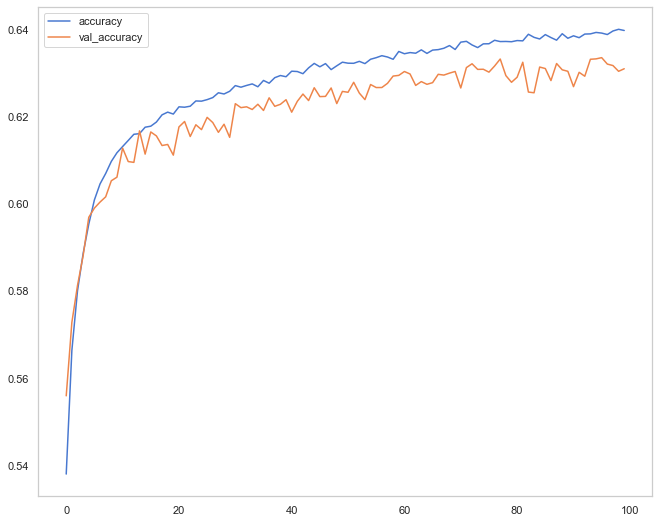

In [142]:
losses[['accuracy','val_accuracy']].plot();

In [143]:
from sklearn.metrics import classification_report,confusion_matrix

In [144]:
predictions = (np.argmax(model.predict(X_test), axis=1)).astype('int32')

In [147]:
print(classification_report(np.argmax(y_test, axis=1),predictions))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67     34187
           1       0.62      0.68      0.65     34094
           2       0.63      0.52      0.57     34196

    accuracy                           0.63    102477
   macro avg       0.63      0.63      0.63    102477
weighted avg       0.63      0.63      0.63    102477

